### Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

### Loading data

In [2]:
train = pd.read_csv(r"E:\nitw\project\Auto Insurance\3rhcxvngkl\train(1).csv")

### Data at first sight
Here is an excerpt of the the data description for the competition:

- Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
- Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
- Features without these designations are either continuous or ordinal.
- Values of -1 indicate that the feature was missing from the observation.
- The target columns signifies whether or not a claim was filed for that policy holder.

Ok, that's important information to get us started. Let's have a quick look at the first and last rows to confirm all of this.

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


We indeed see the following

- binary variables
- categorical variables of which the category values are integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable

Let's look at the number of rows and columns in the train data

In [5]:
train.shape

(595212, 59)

We have 59 variables and 595.212 rows. Let's see if we have the same number of variables in the test data.

Let's see if there are duplicate rows in the training data.

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

No duplicate rows, so that's fine.

So later on we can create dummy variables for the 14 categorical variables. The bin variables are already binary and do not need dummification.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

Again, with the info() method we see that the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1. We'll look into that later.

## Metadata
To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific variables for analysis, visualization, modeling, ...

Concretely we will store:

- role: input, ID, target
- level: nominal, interval, ordinal, binary
- keep: True or False
- dtype: int, float, str

In [8]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [9]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


Example to extract all nominal variables that are not dropped

In [10]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

Below the number of variables per role and level are displayed.

In [11]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,20
2,input,interval,21
3,input,nominal,16
4,target,binary,1


## Descriptive statistics
We can also apply the describe method on the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.

### Interval variables

In [12]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


### Binary variables¶

In [14]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_01,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- A priori in the train data is 3.645%, which is strongly imbalanced.
- From the means we can conclude that for most variables the value is zero in most cases.

## Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

- oversampling records with target=1
- undersampling records with target=0

There are many more strategies of course and MachineLearningMastery.com gives a nice overview. As we have a rather large training set, we can go for undersampling.

In [16]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


## Data Quality Checks

### Checking missing values
Missings are represented as -1

In [17]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 11 variables with missing values


- ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
- ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
- ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
- ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [18]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Checking the cardinality of the categorical variables
Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_03 has 12 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values
Variable ps_car_11 has 4 distinct values


Only ps_car_11_cat has many distinct values, although it is still reasonable.

In [26]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,  
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    return add_noise(ft_trn_series, noise_level)

In [27]:
train_encoded = target_encode(train["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta

## Exploratory Data Visualization¶

### Categorical variables
Let's look into the categorical variables and the proportion of customers with target = 1

<Figure size 432x288 with 0 Axes>

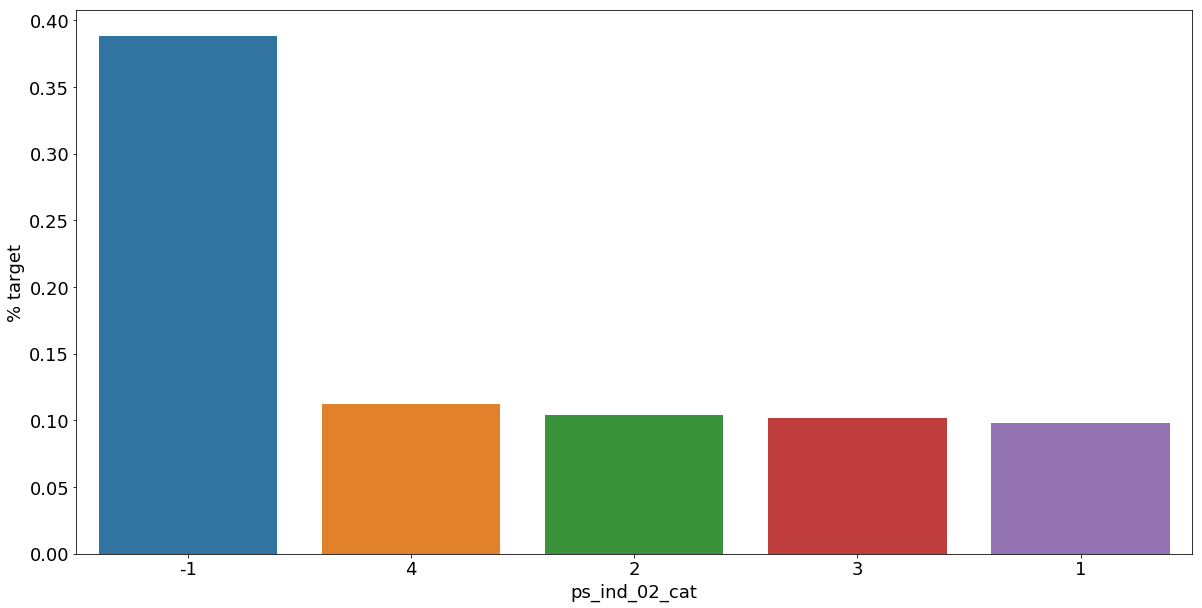

<Figure size 432x288 with 0 Axes>

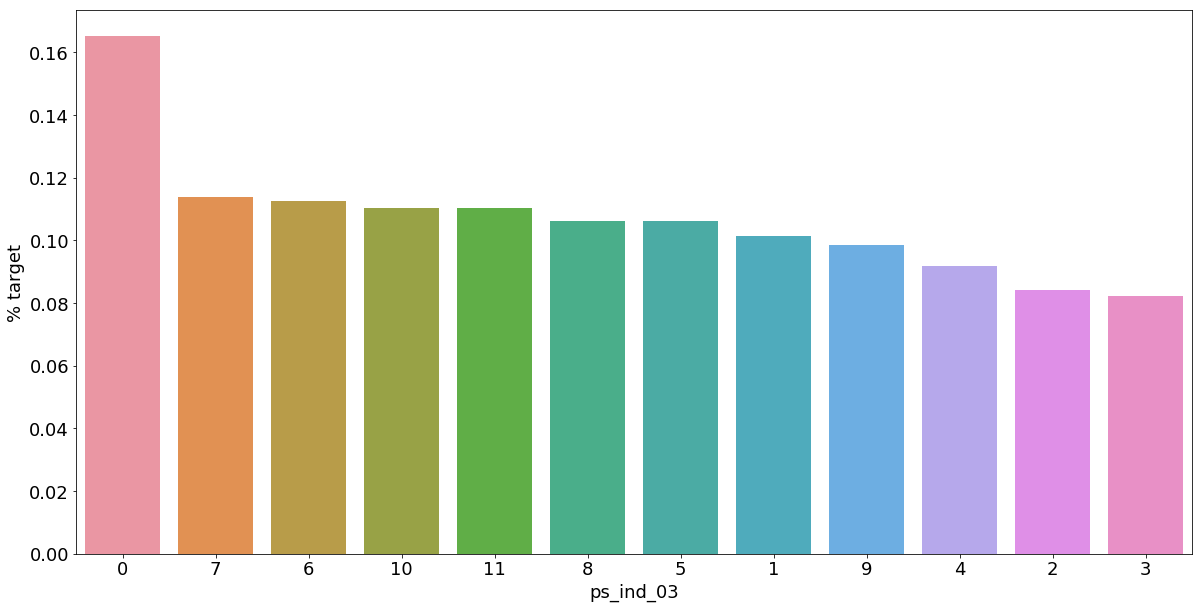

<Figure size 432x288 with 0 Axes>

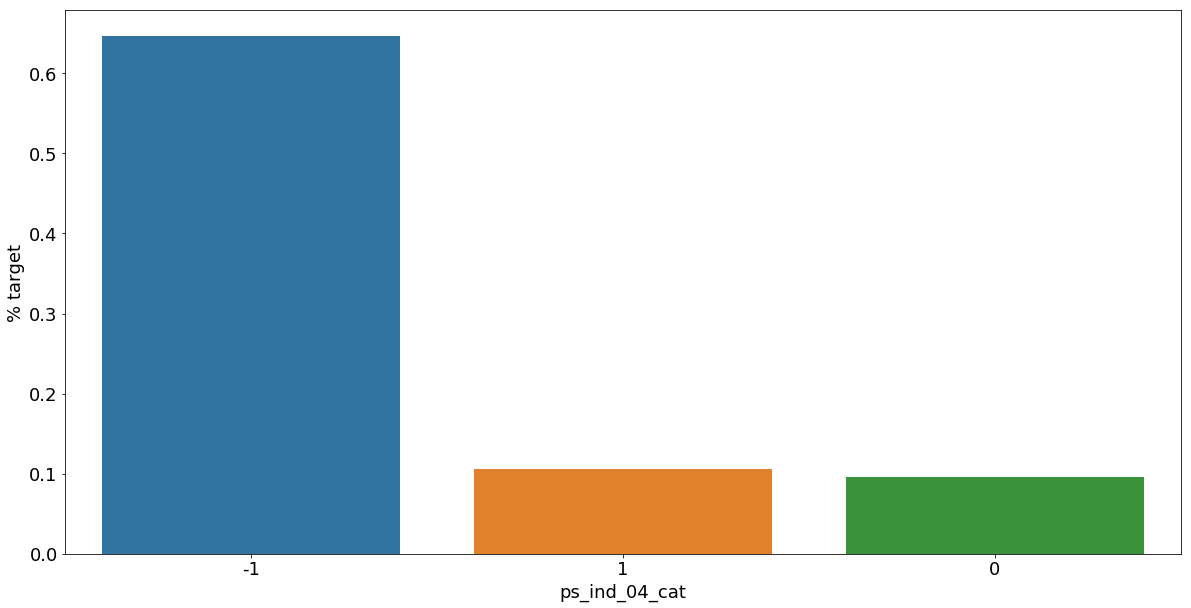

<Figure size 432x288 with 0 Axes>

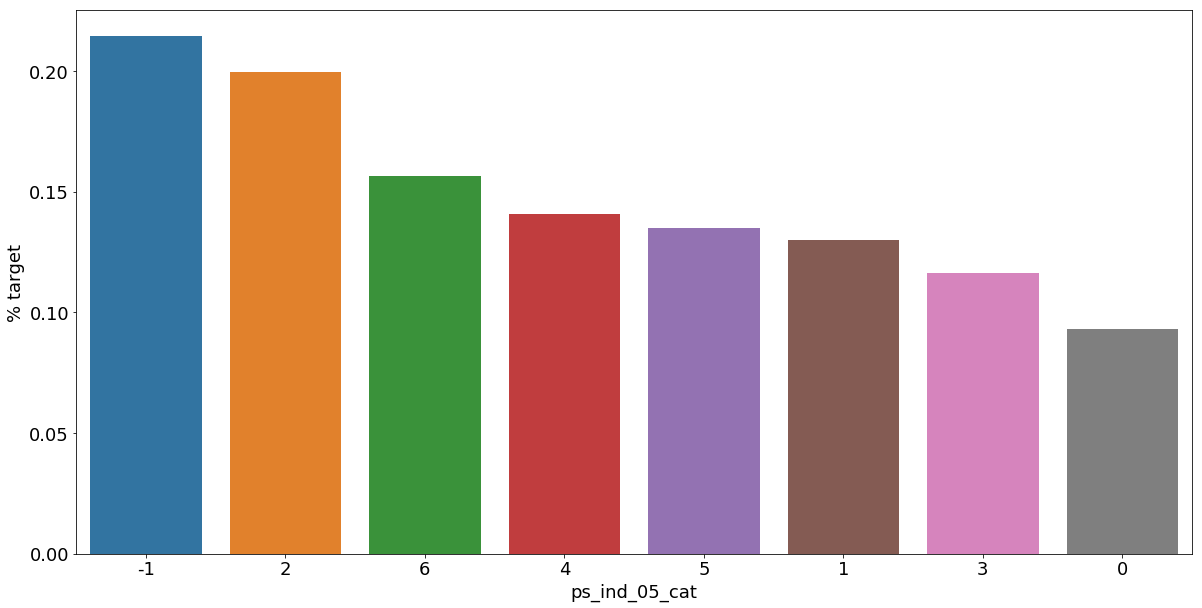

<Figure size 432x288 with 0 Axes>

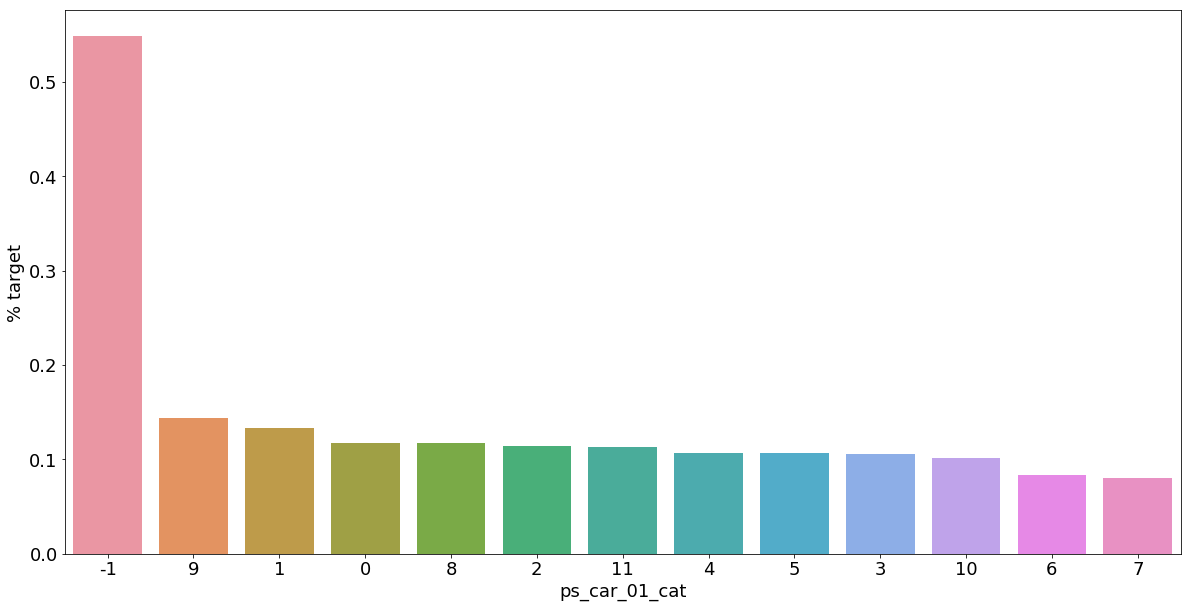

<Figure size 432x288 with 0 Axes>

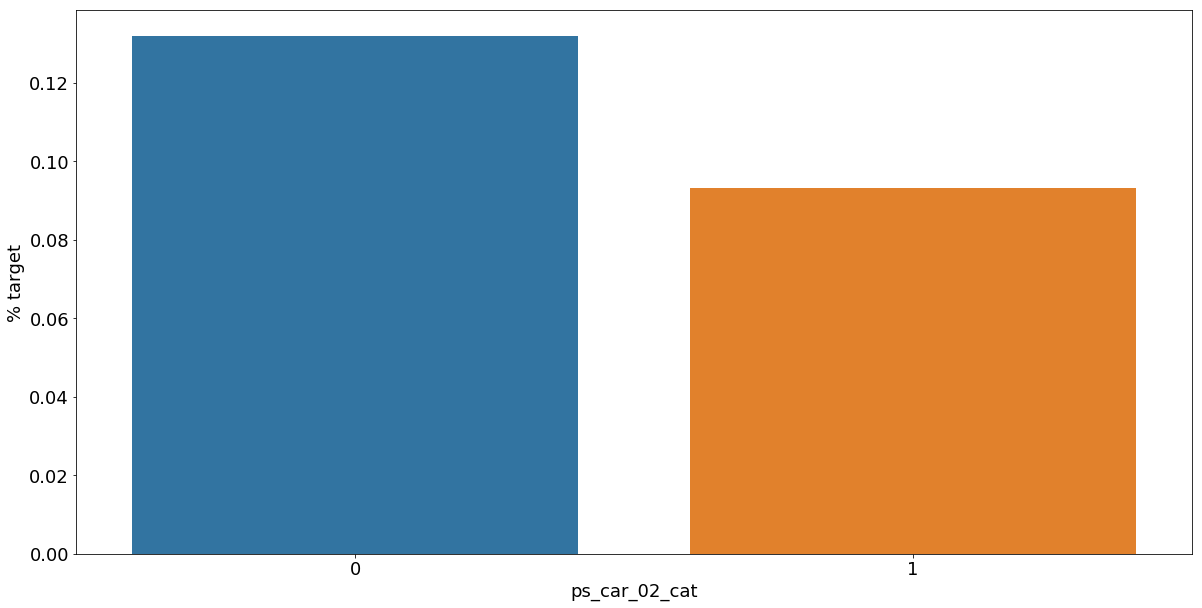

<Figure size 432x288 with 0 Axes>

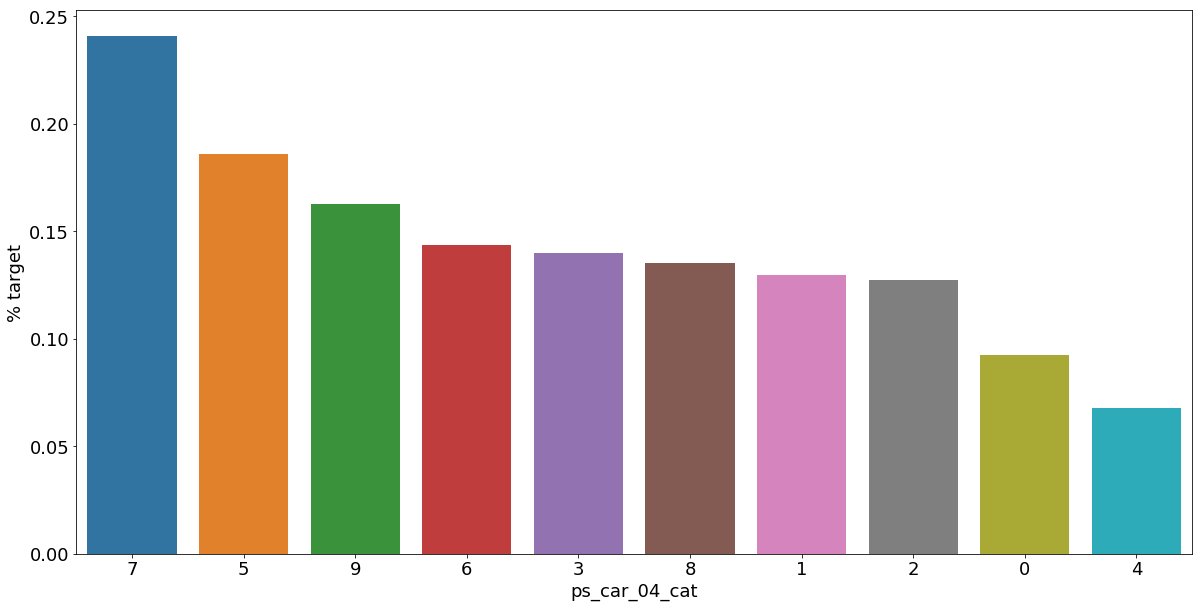

<Figure size 432x288 with 0 Axes>

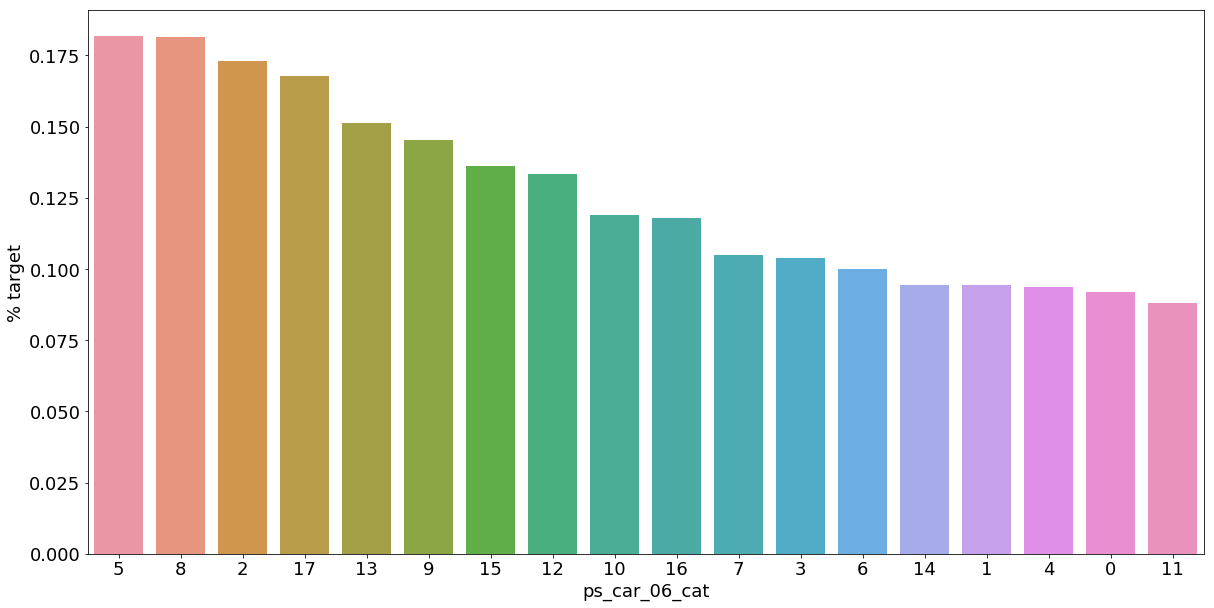

<Figure size 432x288 with 0 Axes>

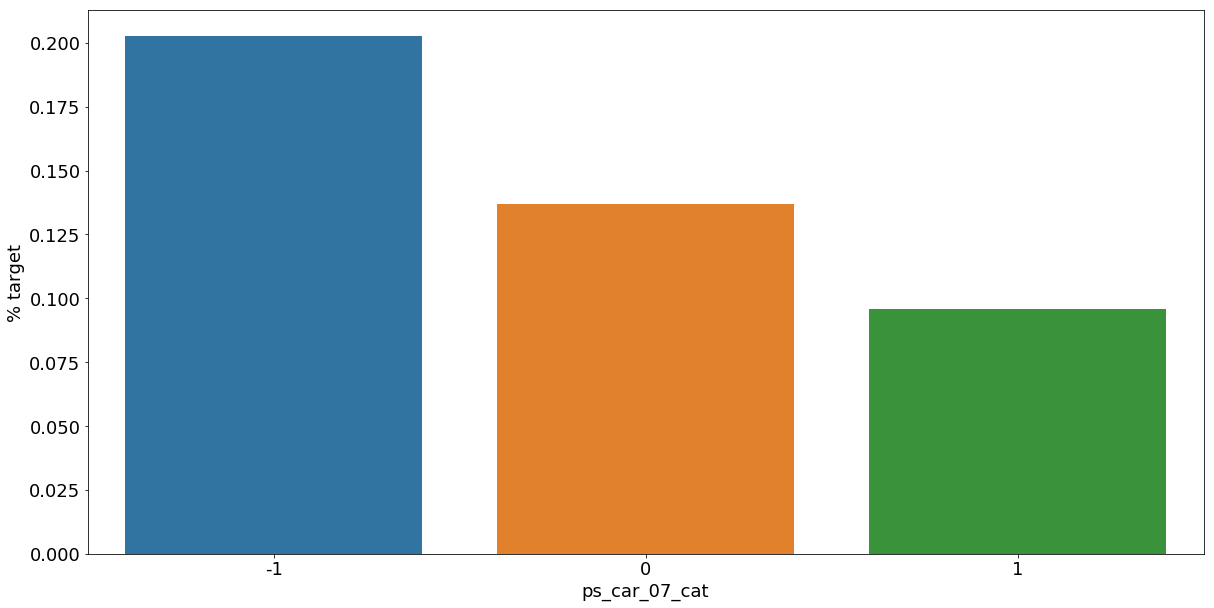

<Figure size 432x288 with 0 Axes>

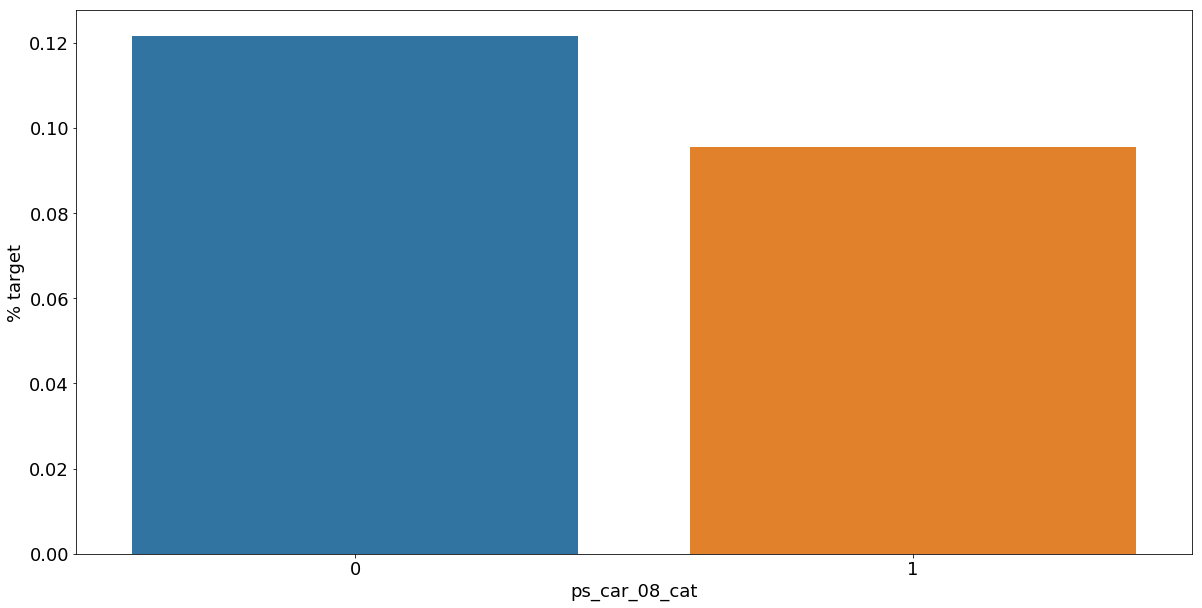

<Figure size 432x288 with 0 Axes>

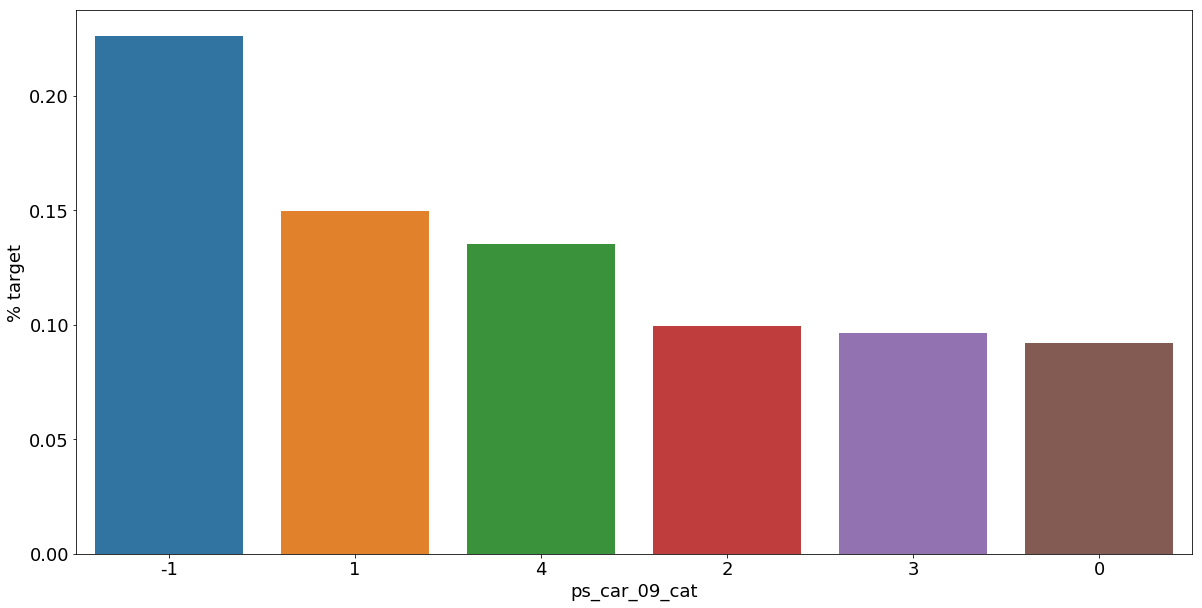

<Figure size 432x288 with 0 Axes>

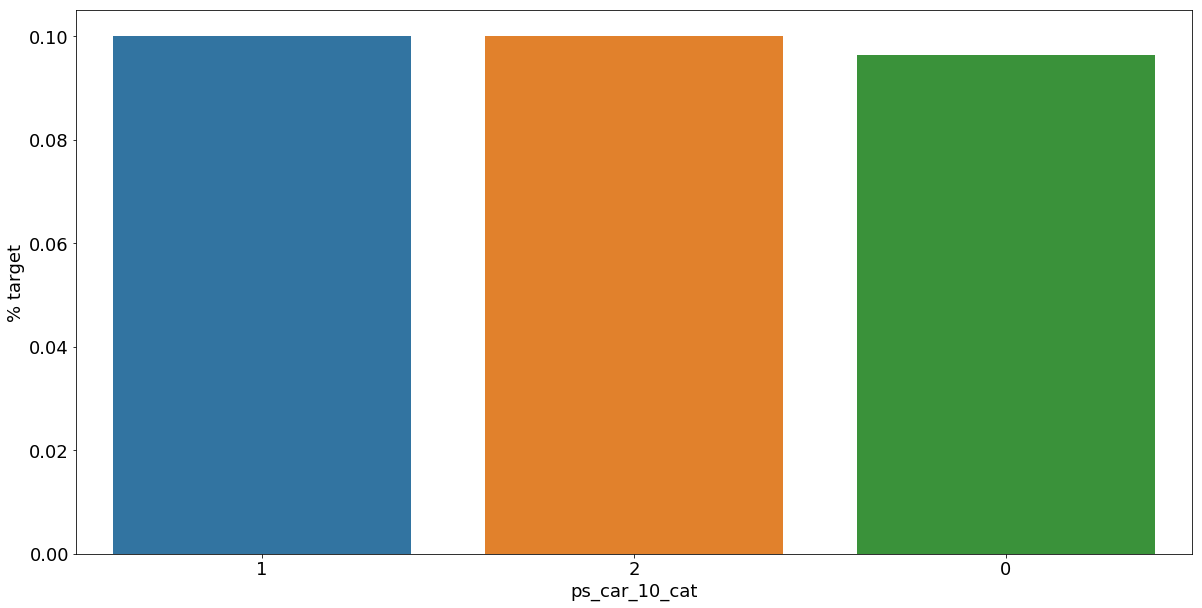

<Figure size 432x288 with 0 Axes>

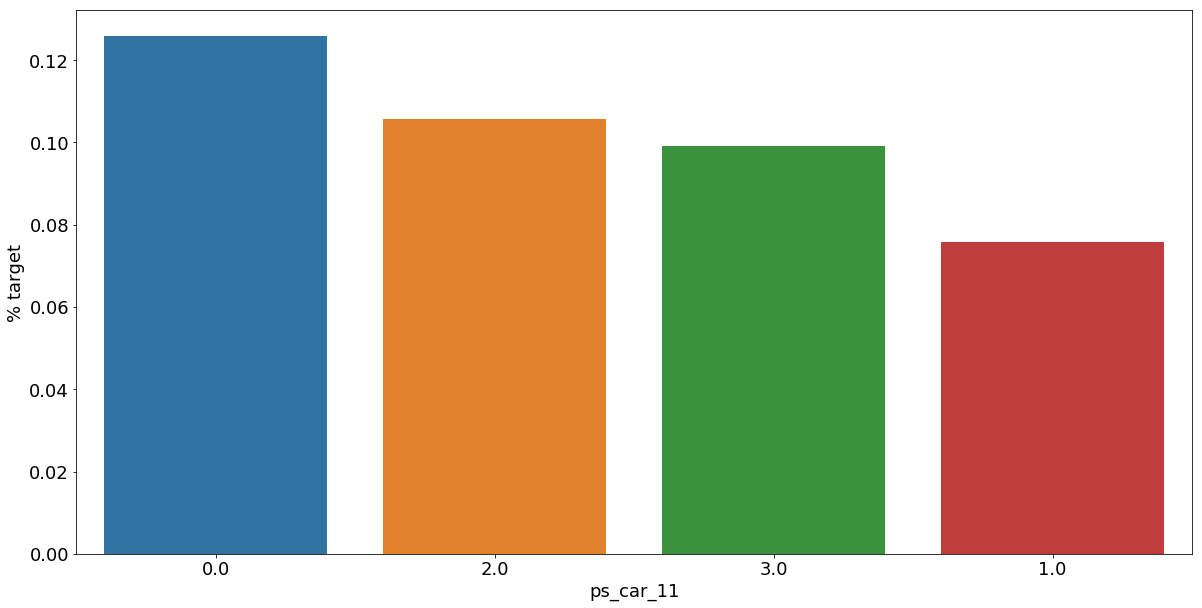

In [28]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

### Interval variables¶
Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables.

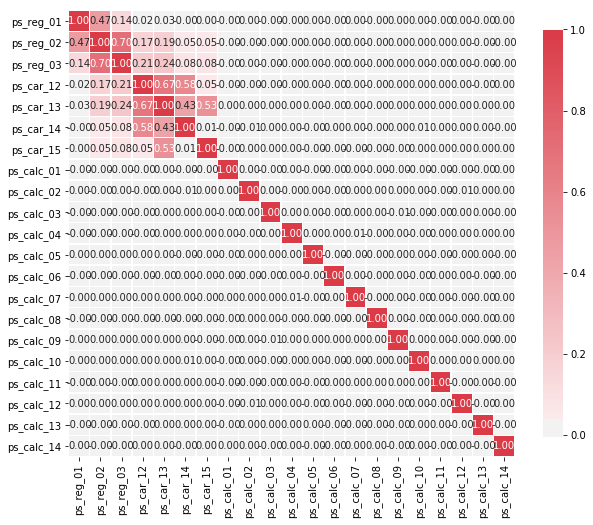

In [29]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)
Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a pairplot to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.

In [30]:
s = train.sample(frac=0.1)

ps_reg_02 and ps_reg_03
As the regression line shows, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.

C:\Users\Hemanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


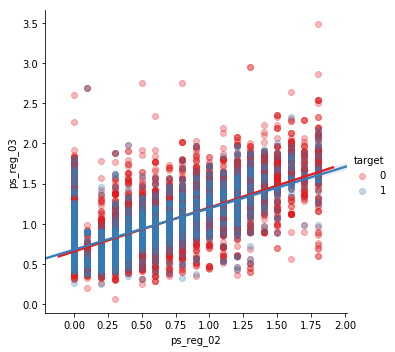

In [31]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

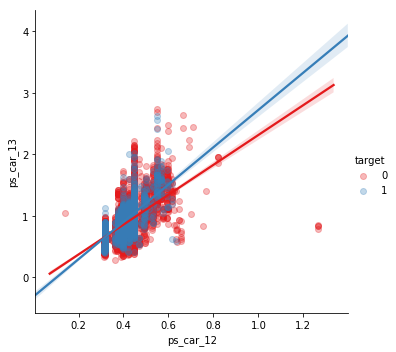

In [32]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

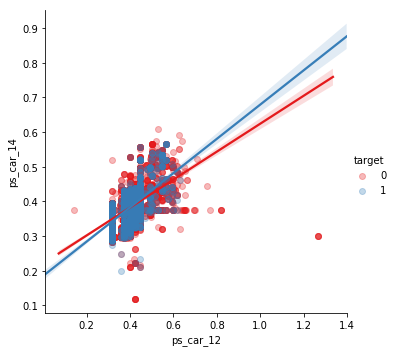

In [33]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

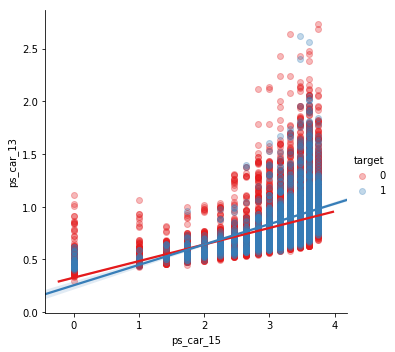

In [34]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

## Feature engineering¶
Creating dummy variables
The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [36]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 120 variables in train


In [37]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 120 variables in train
After creating interactions we have 351 variables in train


## Feature selection¶
 
Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: VarianceThreshold. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [38]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


### Selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

In [39]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.008728
 2) ps_car_13                      0.006686
 3) ps_car_13^2                    0.006681
 4) ps_car_12 ps_car_13            0.006572
 5) ps_car_13 ps_calc_08           0.006568
 6) ps_car_13 ps_calc_06           0.006561
 7) ps_car_13 ps_car_14            0.006394
 8) ps_car_13 ps_car_15            0.006322
 9) ps_reg_03 ps_car_13            0.006243
10) ps_reg_01 ps_car_13            0.006210
11) ps_car_14 ps_calc_08           0.006113
12) ps_car_14 ps_calc_06           0.006055
13) ps_car_14 ps_car_15            0.005859
14) ps_reg_03 ps_car_14            0.005813
15) ps_car_13 ps_calc_10           0.005805
16) ps_car_13 ps_calc_14           0.005794
17) ps_car_13 ps_calc_11           0.005707
18) ps_reg_03 ps_calc_08           0.005705
19) ps_reg_03 ps_car_12            0.005625
20) ps_reg_03 ps_calc_06           0.005616
21) ps_car_14 ps_calc_10           0.005504
22) ps_reg_03 ps_calc_10           0.005485
23) ps_car_13 ps_calc_07        

With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the get_support method we can then limit the number of variables in the train data.

In [40]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 349
Number of features after selection: 175


## Feature scaling
As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [41]:
train = train[selected_vars + ['target']]

In [42]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hemanth\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.05087653, -0.19249805, -1.21861268, ..., -1.46407092,
        -1.03879953,  0.14885213],
       [-0.63847299, -0.54038238, -1.91321596, ..., -0.8374843 ,
        -1.03879953, -0.04208459],
       [-0.92003125, -0.093839  , -0.01284246, ...,  1.20936532,
         0.87224836,  0.53072557],
       ...,
       [ 0.48776003, -0.59266547,  0.67617667, ..., -0.96280163,
         0.10782921, -0.99676819],
       [-1.48314775, -1.02004065,  0.26043255, ..., -0.87925675,
        -1.03879953, -0.36031245],
       [ 1.61399304,  0.62243768, -0.2847494 , ...,  0.91695823,
         0.68114358,  0.91259901]])

In [43]:
train.head()

,ps_ind_15,ps_reg_03,ps_car_13,ps_car_14,ps_car_11_cat_te,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_06,ps_reg_01 ps_calc_08,ps_reg_01 ps_calc_10,ps_reg_01 ps_calc_11,ps_reg_01 ps_calc_14,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_02 ps_calc_06,ps_reg_02 ps_calc_08,ps_reg_02 ps_calc_10,ps_reg_02 ps_calc_11,ps_reg_02 ps_calc_14,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_reg_03 ps_calc_04,ps_reg_03 ps_calc_05,ps_reg_03 ps_calc_06,ps_reg_03 ps_calc_07,ps_reg_03 ps_calc_08,ps_reg_03 ps_calc_09,ps_reg_03 ps_calc_10,ps_reg_03 ps_calc_11,ps_reg_03 ps_calc_12,ps_reg_03 ps_calc_13,ps_reg_03 ps_calc_14,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,...,ps_calc_02 ps_calc_11,ps_calc_02 ps_calc_13,ps_calc_02 ps_calc_14,ps_calc_03 ps_calc_04,ps_calc_03 ps_calc_06,ps_calc_03 ps_calc_07,ps_calc_03 ps_calc_08,ps_calc_03 ps_calc_09,ps_calc_03 ps_calc_10,ps_calc_03 ps_calc_11,ps_calc_03 ps_calc_13,ps_calc_03 ps_calc_14,ps_calc_04 ps_calc_06,ps_calc_04 ps_calc_08,ps_calc_04 ps_calc_10,ps_calc_04 ps_calc_11,ps_calc_04 ps_calc_14,ps_calc_05 ps_calc_08,ps_calc_05 ps_calc_10,ps_calc_05 ps_calc_11,ps_calc_05 ps_calc_14,ps_calc_06 ps_calc_07,ps_calc_06 ps_calc_08,ps_calc_06 ps_calc_09,ps_calc_06 ps_calc_10,ps_calc_06 ps_calc_11,ps_calc_06 ps_calc_13,ps_calc_06 ps_calc_14,ps_calc_07 ps_calc_08,ps_calc_07 ps_calc_10,ps_calc_07 ps_calc_11,ps_calc_07 ps_calc_13,ps_calc_07 ps_calc_14,ps_calc_08 ps_calc_09,ps_calc_08 ps_calc_10,ps_calc_08 ps_calc_11,ps_calc_08 ps_calc_13,ps_calc_08 ps_calc_14,ps_calc_09 ps_calc_10,ps_calc_09 ps_calc_11,ps_calc_09 ps_calc_14,ps_calc_10 ps_calc_11,ps_calc_10 ps_calc_12,ps_calc_10 ps_calc_13,ps_calc_10 ps_calc_14,ps_calc_11 ps_calc_13,ps_calc_11 ps_calc_14,ps_calc_12 ps_calc_14,ps_calc_13 ps_calc_14,target
0,11,0.838153,0.540603,0.345688,0.095702,0.502892,0.221269,0.324362,0.207413,1.200000,4.2,4.8,4.8,0.6,3.6,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,4.2,4.8,4.8,0.6,3.6,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,2.514458,0.000000,5.867069,2.514458,6.705222,3.352611,6.705222,0.838153,0.000000,3.352611,5.028916,0.199365,0.127483,0.737564,...,0.3,1.2,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,24.0,24.0,3.0,18.0,0.0,0.0,0.0,0.0,21.0,56.0,28.0,56.0,7.0,28.0,42.0,24.0,24.0,3.0,12.0,18.0,32.0,64.0,8.0,32.0,48.0,32.0,4.0,24.0,8.0,0.0,32.0,48.0,4.0,6.0,0.0,24.0,0
1,5,0.728440,0.382953,0.378814,0.123496,0.655596,0.381838,0.344658,0.340933,0.000000,6.3,9.0,9.9,2.7,6.3,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,4.2,6.0,6.6,1.8,4.2,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.728440,0.728440,5.099081,3.642201,7.284401,2.913760,8.012841,2.185320,0.000000,2.185320,5.099081,0.162473,0.160717,0.000000,...,0.0,0.0,0.0,0.6,4.2,3.0,6.0,2.4,6.6,1.8,1.8,4.2,7.0,10.0,11.0,3.0,7.0,10.0,11.0,3.0,7.0,35.0,70.0,28.0,77.0,21.0,21.0,49.0,50.0,55.0,15.0,15.0,35.0,40.0,110.0,30.0,30.0,70.0,44.0,12.0,28.0,33.0,0.0,33.0,77.0,9.0,21.0,0.0,21.0,0
2,4,0.869267,0.814271,0.402368,0.096566,0.782340,0.360000,0.732844,0.362131,2.984962,7.2,9.0,7.2,6.3,9.0,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,4.8,6.0,4.8,4.2,6.0,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,3.477068,0.869267,6.954135,4.346335,8.692669,1.738534,6.954135,6.084869,1.738534,2.607801,8.692669,0.325708,0.160947,1.326650,...,6.3,2.7,9.0,0.4,0.8,0.5,1.0,0.2,0.8,0.7,0.3,1.0,32.0,40.0,32.0,28.0,40.0,10.0,8.0,7.0,10.0,40.0,80.0,16.0,64.0,56.0,24.0,80.0,50.0,40.0,35.0,15.0,50.0,20.0,80.0,70.0,30.0,100.0,16.0,14.0,20.0,56.0,16.0,24.0,80.0,21.0,70.0,20.0,30.0,0
3,8,1.705872,0.838387,0.378418,0.087027,1.023523,0.240000,0.503032,0.227051,2.163331,4.2,

## Training

### XGBOOST

In [52]:
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [53]:
X = train.drop(['target'], axis=1)
features = X.columns
X = X.values
y = train['target'].values

# Splitting the dataset into the Training set and Test set.
X_train_check, X_val_check, y_train_check, y_val_check = train_test_split(X, y, test_size = 0.2, random_state = 20)
#Split is 80%-20% for testing. Here X_test~Validation set.


print(X_train_check.shape, X_val_check.shape, y_train_check.shape, y_val_check.shape)

(173552, 175) (43388, 175) (173552,) (43388,)


In [59]:
xgb_model = XGBClassifier(learning_rate =0.05,n_estimators=1000,max_depth=4 ,min_child_weight=1, gamma=5, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',nthread=4, scale_pos_weight=1, seed=1234)

In [60]:
xgb_model.fit(X_train_check, y_train_check, eval_metric = 'auc')

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=1234, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1234, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [63]:
check_y_pred4 = xgb_model.predict(X_val_check)
from sklearn.metrics import f1_score
f1_score(check_y_pred4, y_val_check , average = 'micro')

0.902023600995667

### lightgbm

In [64]:
check_train_data=lgb.Dataset(X_train_check,label=y_train_check)

In [66]:
params = {'min_data': 500,
    'max_bin':10,
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.01,
    'max_depth': 10,
    'num_leaves': 16,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.9,
    'bagging_freq': 10 }

In [72]:
model = lgb.train(params, check_train_data, num_boost_round=200)

In [73]:
check_y_pred = model.predict(X_val_check)

In [74]:
best_preds_check = np.asarray([np.argmax(line) for line in check_y_pred])

In [75]:
f1_score(best_preds_check, y_val_check , average = 'micro')

0.9020005531483359